**1. Group Name:** Best Neighborhood in Pittsburgh for College Students

**2. Introduction:** To determine the best neighborhood in Pittsburgh, we analyzed various datasets to identify common factors that could define what "best" means in this context. Our primary goal was to select a unique metric, which led us to focus on identifying the neighborhood best suited for college students. With this main metric established, we defined submetrics, including access to supermarkets, public transportation, and recreational areas like parks. While exploring datasets in the WPRDC database, we aimed to find data that aligned with our metric, although finding specific datasets posed some challenges.

**3. Individual Metrics**

* ***Metric 1*** Availability of recreation [Michael Puthumana]

About the dataset: I went about finding how easily college students could access recreational activities in their neighborhood through identifying parks features individuals could use for recreation in their neighborhood. I used a dataset containing different park features in different parks around pittsburgh and measured the count of the features present and mapped them to the neighborhood that the park was in. I then mapped out the count and plotted it below. Due to the data set not including information on neighborhoods, I had to manually search the parks' location on Google.

Park Feature Dataset Link: https://data.wprdc.org/dataset/allegheny-county-park-features/resource/9bd66142-ffbe-4342-9ed8-d2a11dcce60f

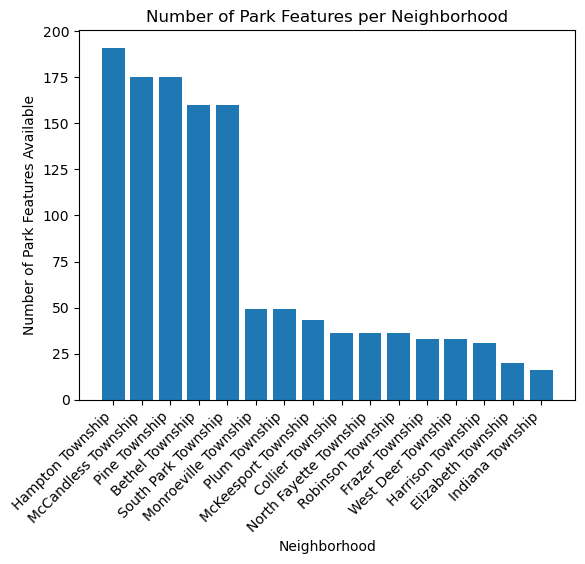

                        Number of Park Features per Neighborhood
neighborhood                                                    
Hampton Township                                             191
McCandless Township                                          175
Pine Township                                                175
Bethel Township                                              160
South Park Township                                          160
Monroeville Township                                          49
Plum Township                                                 49
McKeesport Township                                           43
Collier Township                                              36
North Fayette Township                                        36
Robinson Township                                             36
Frazer Township                                               33
West Deer Township                                            33
Harrison Township        

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("parkFeatureData.csv")

# Extract all park names
unique_centers = df['center'].unique()
unique_centers_list = unique_centers.tolist()
#print("Unique center names:", unique_centers_list)

#swap centers to neighborhood for graphing
center_to_neighborhood = {
    'Boyce Park': ['Monroeville Township','Plum Township'],
    'Hartwood Acres Park': ['Hampton Township','Indiana Township'],
    'Harrison Hills Park': 'Harrison Township',
    'North Park': ['Hampton Township','McCandless Township','Pine Township'],
    'Round Hill Park': 'Elizabeth Township',
    "Settler's Cabin Park":['Collier Township','North Fayette Township','Robinson Township'],
    'South Park':['Bethel Township','South Park Township'],
    'White Oak Park':'McKeesport Township',
    'Deer Lakes Park':['Frazer Township','West Deer Township']
}

#create dataframe for counts
df['neighborhood'] = df['center'].map(center_to_neighborhood)

#separate lists into individual neighborhoods rather than a grouped list
df = df.explode('neighborhood')

#count instances of each neighborhood
count = df['neighborhood'].value_counts()

#create bar plot
plt.bar(count.index, count.values)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Park Features Available')
plt.title('Number of Park Features per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

#display table
neighborhood_counts_df = pd.DataFrame(count)
neighborhood_counts_df.columns = ['Number of Park Features per Neighborhood']
print(neighborhood_counts_df)

* ***Metric 2*** Number of Supermarkets [Lalit More] The main goal for using this metric was to choose a neighborhood with the most number of supermarkets.

About the data set: I used two data sets. One lists all the supermarkets in Pittsburgh with their zipcode and the other dataset contained all of the zipcodes in Pittsburgh along with their corresponding neighbourhood. I combined the two data sets so that the supermarket dataset would contain which neighbourhood the supermarket was in.

Supermarket Data Set Link: https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores

Zip codes and Neighbourhood Data Set Link: https://data.wprdc.org/dataset/allegheny-county-zip-code-boundaries2/resource/0c781f02-2bb9-4d0c-9c45-879bde957f34

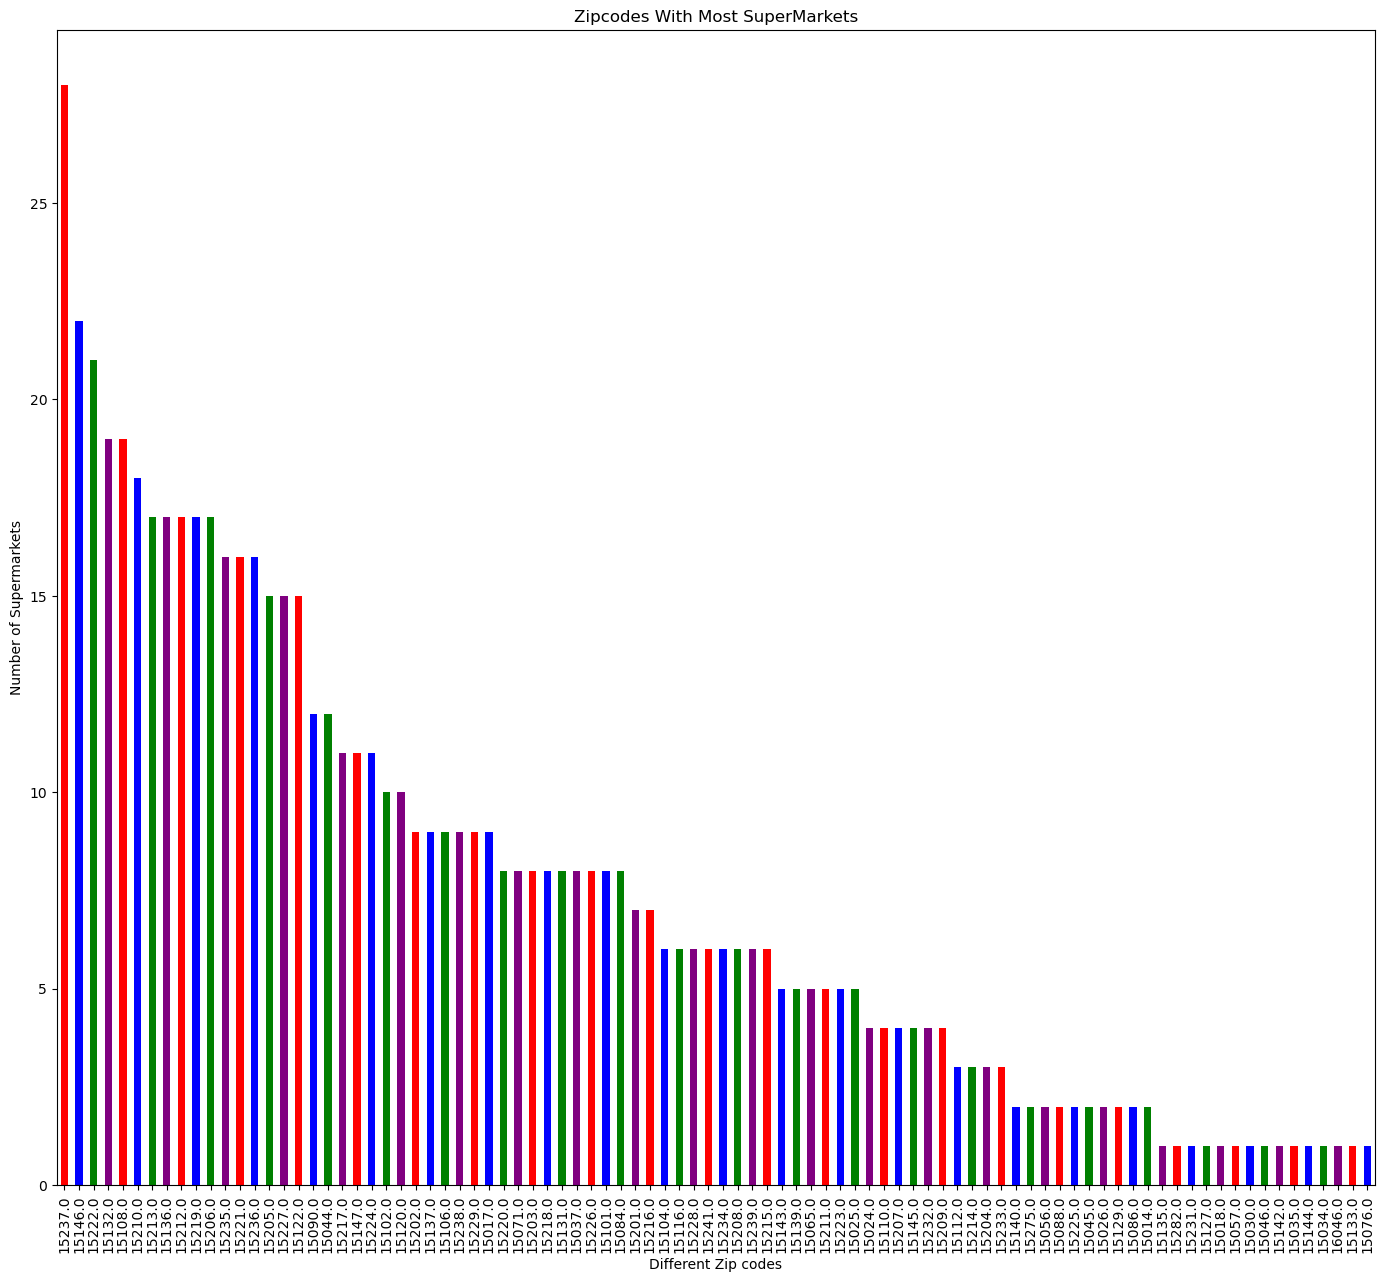

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("superMarketData.csv")
count = df['Zip'].value_counts()
#print(fpsnippets.zip_to_neighborhoods(15282))
#print(fpsnippets.geo_to_neighborhood(40.367923, -79.780429 ))

colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(17, 15))
count.plot(kind='bar',color = colors, x='name')
plt.xlabel('Different Zip codes')
plt.ylabel('Number of Supermarkets')
plt.title('Zipcodes With Most SuperMarkets')
plt.show()

Graph #1 Results: From this graph it is clear that the area with zipcode 15237 is the place with the most number of neighbourhoods. However, we need the neighbourhood with the most supermarket and not the zipcode.plt.show()

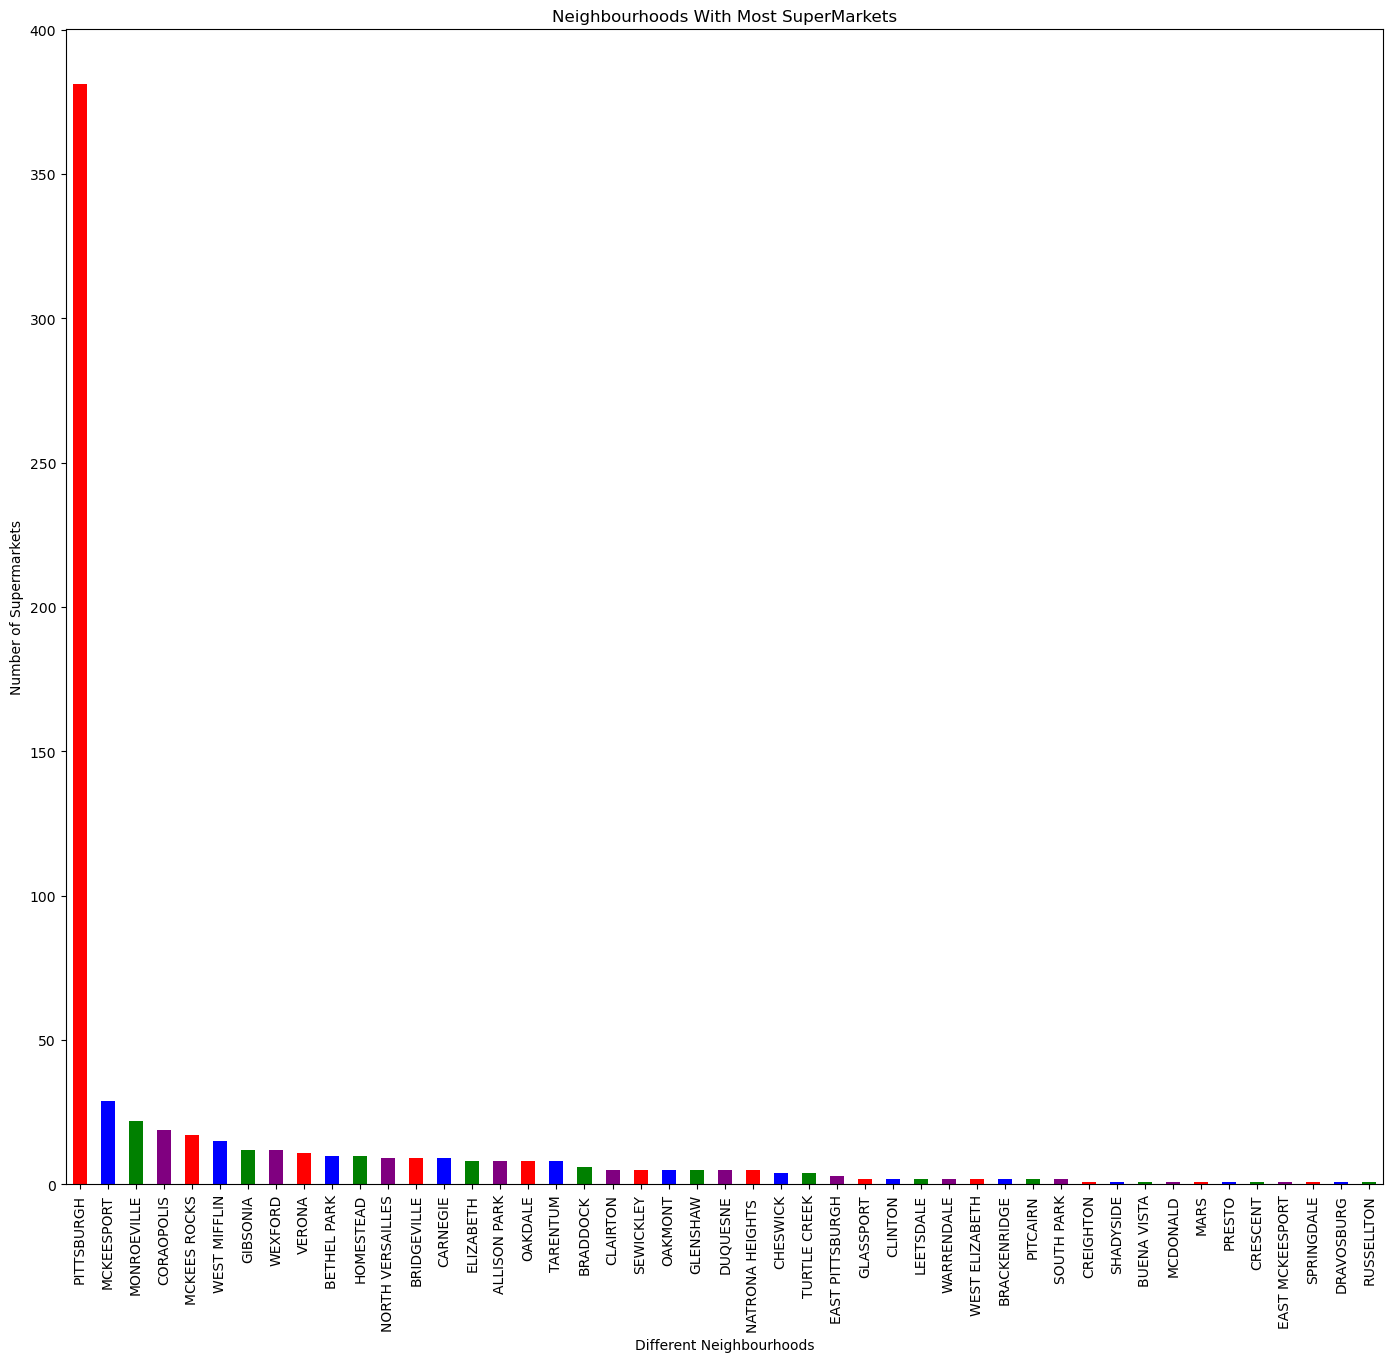

In [12]:
count = df['Neighbourhood'].value_counts() #key error raising here

colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(17, 15))
count.plot(kind='bar',color = colors, x='name')
plt.xlabel('Different Neighbourhoods')
plt.ylabel('Number of Supermarkets')
plt.title('Neighbourhoods With Most SuperMarkets')
plt.show()


* ***Metric 3:*** Public transportation{Daniel Cuff]

Intro: The main goal of this metric was to assess which neighboorhood has the best public transportation, as easily accessible transportation can be extremely beneficial and convenient for college students for getting around. To define which neighboorhood has the best public transportation, I decided to focus on how on time the buses were, as I thought this would best represent the accessibility and the convenience of the buses in the different neighborhoods in Pittsburgh.

About the dataset: I used a dataset that analyzes the on time performance of the buses for each route in different neighborhoods by month. "On time" is defined as no more than one minute early and 5 minutes l

Data set link: https://data.wprdc.org/datastore/dump/00eb9600-69b5-4f11-b20a-8c8ddd8cfe7aate.

Index(['_id', 'route', 'ridership_route_code', 'route_full_name',
       'current_garage', 'mode', 'month_start', 'year_month', 'day_type',
       'on_time_percent', 'data_source'],
      dtype='object')


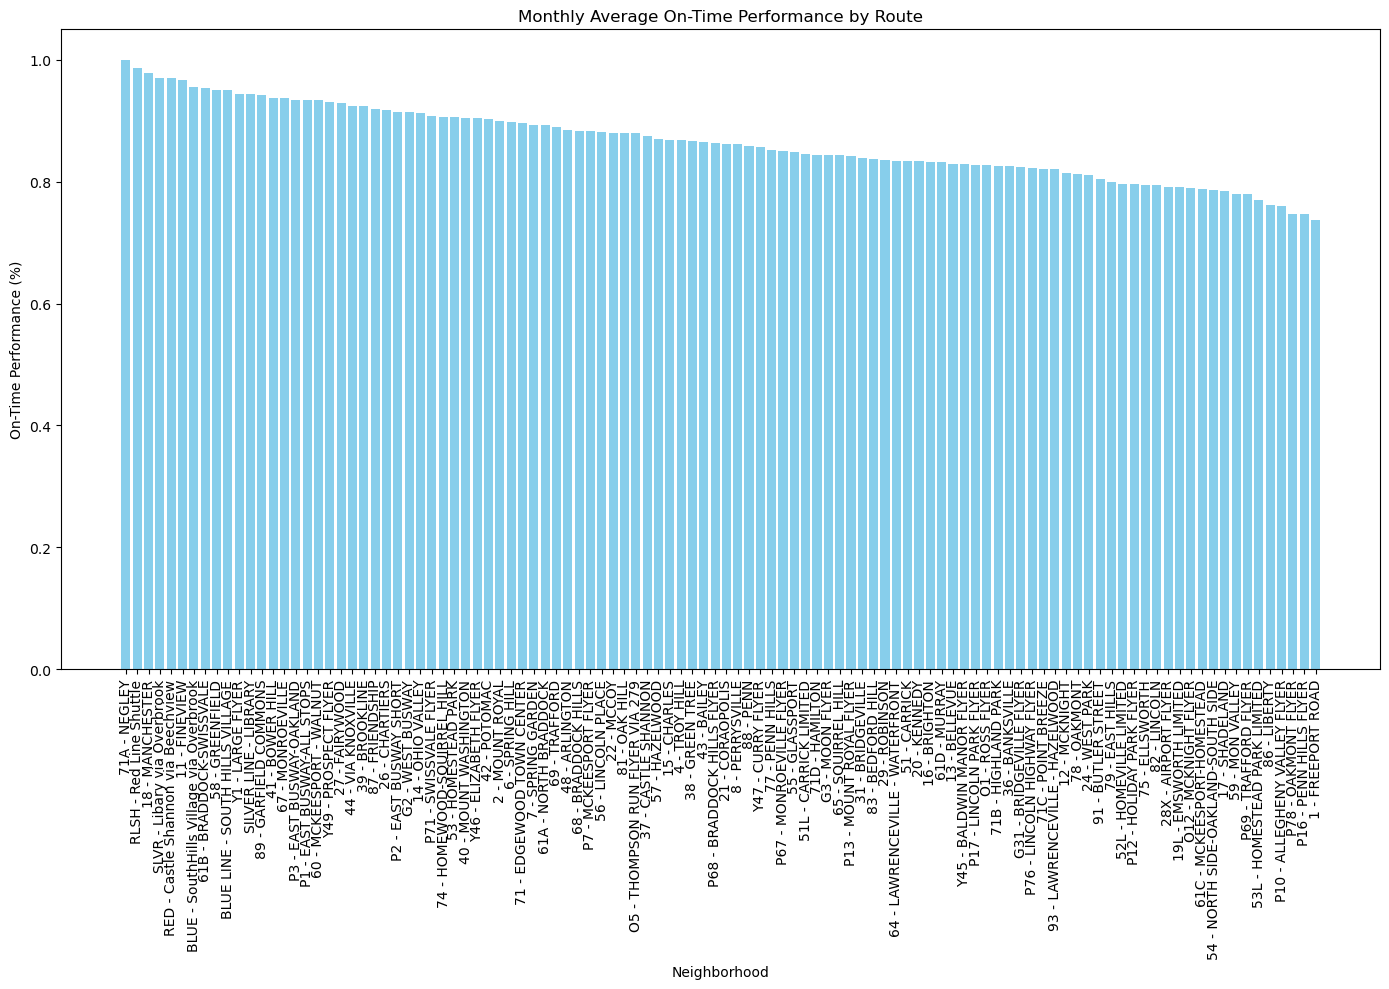

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('busroutes.csv')

print(data.columns)

if 'route' in data.columns and 'on_time_percent' in data.columns:

    data['route_full_name'] = data['route_full_name'].astype(str)
    data['on_time_percent'] = pd.to_numeric(data['on_time_percent'], errors='coerce')
    
    data = data.dropna(subset=['on_time_percent'])

    filtered_data = data[~data['route_full_name'].isin(['nan', 'East Liberty/West Mifflin'])]

    sorted_data = filtered_data.sort_values(by='on_time_percent', ascending=False)

    plt.figure(figsize=(14, 10))
    plt.bar(sorted_data['route_full_name'], sorted_data['on_time_percent'], color='skyblue')
    plt.xlabel('Neighborhood')
    plt.ylabel('On-Time Performance (%)')
    plt.title('Monthly Average On-Time Performance by Route')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Conclusion: Based on the on time performance, Negley has the best performance when it comes to on-time buses, while the route freeport road, which is in Fox Chapel, has the lowest performance. Note that Monroeville was not the best although it was still very high, sitting in the top fifteen.

**4. Best Neighborhood:** Monroeville

**5. Conclusion:**